In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/robertpatton/Desktop/Desktop - Robert’s MacBook Pro/D214/Hospital_Ratings_clean.csv', index_col=0)

In [3]:
#Get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18386 entries, 0 to 25973
Data columns (total 82 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   OSHPDID                                   18386 non-null  int64  
 1   #_Adverse_Events                          18386 non-null  float64
 2   County_Amador                             18386 non-null  int64  
 3   County_Butte                              18386 non-null  int64  
 4   County_Calaveras                          18386 non-null  int64  
 5   County_Colusa                             18386 non-null  int64  
 6   County_Contra Costa                       18386 non-null  int64  
 7   County_Del Norte                          18386 non-null  int64  
 8   County_El Dorado                          18386 non-null  int64  
 9   County_Fresno                             18386 non-null  int64  
 10  County_Glenn                      

In [4]:
#Convert adverse events from float to int
df = df.astype({"#_Adverse_Events": float, "#_Adverse_Events": int})

In [5]:
#Confirm conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18386 entries, 0 to 25973
Data columns (total 82 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   OSHPDID                                   18386 non-null  int64
 1   #_Adverse_Events                          18386 non-null  int64
 2   County_Amador                             18386 non-null  int64
 3   County_Butte                              18386 non-null  int64
 4   County_Calaveras                          18386 non-null  int64
 5   County_Colusa                             18386 non-null  int64
 6   County_Contra Costa                       18386 non-null  int64
 7   County_Del Norte                          18386 non-null  int64
 8   County_El Dorado                          18386 non-null  int64
 9   County_Fresno                             18386 non-null  int64
 10  County_Glenn                              18386 non-null  

In [6]:
#Create initial regression model 
y= df['#_Adverse_Events']
X= df.drop(['#_Adverse_Events'], axis=1).assign(const=1)

df_model=sm.OLS(y, X)
df_results= df_model.fit()
print(df_results.summary())

                            OLS Regression Results                            
Dep. Variable:       #_Adverse_Events   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     22.54
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          2.00e-310
Time:                        10:56:21   Log-Likelihood:                -70763.
No. Observations:               18386   AIC:                         1.417e+05
Df Residuals:                   18304   BIC:                         1.423e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

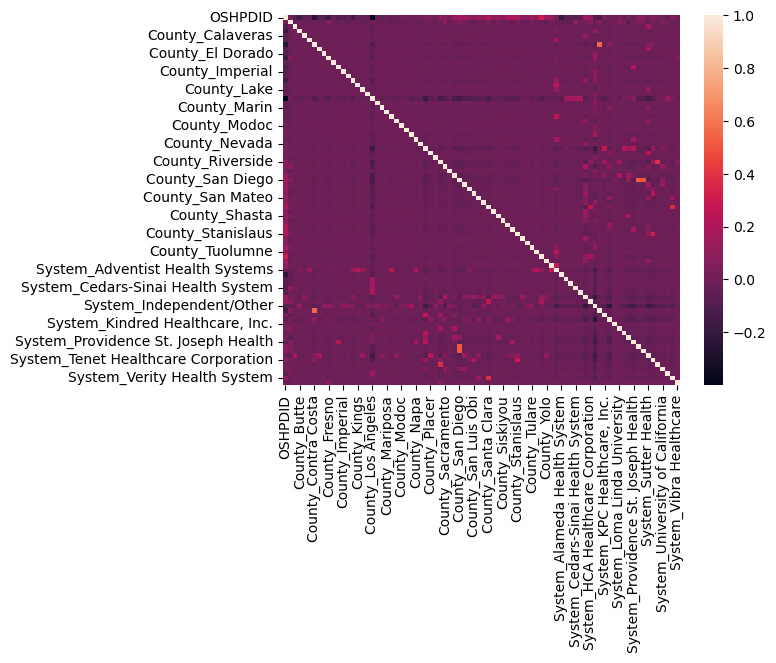

In [7]:
#Create heatmap
heatmap= df

sns.heatmap(heatmap.corr(), annot=False)
plt.show()

In [8]:
#Remove variables with high p-values, start with System_Kindred Healthcare, Inc.
y= df['#_Adverse_Events']
X= df.drop(['#_Adverse_Events', 'System_Kindred Healthcare, Inc.'], axis=1).assign(const=1)

df_model=sm.OLS(y, X)
df_results= df_model.fit()
print(df_results.summary())

                            OLS Regression Results                            
Dep. Variable:       #_Adverse_Events   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     22.82
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          4.60e-311
Time:                        10:56:22   Log-Likelihood:                -70763.
No. Observations:               18386   AIC:                         1.417e+05
Df Residuals:                   18305   BIC:                         1.423e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [9]:
#Remove System_Verity Health System
y= df['#_Adverse_Events']
X= df.drop(['#_Adverse_Events', 'System_Kindred Healthcare, Inc.', 'System_Verity Health System'], axis=1).assign(const=1)

df_model=sm.OLS(y, X)
df_results= df_model.fit()
print(df_results.summary())

                            OLS Regression Results                            
Dep. Variable:       #_Adverse_Events   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     23.11
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          1.09e-311
Time:                        10:56:22   Log-Likelihood:                -70763.
No. Observations:               18386   AIC:                         1.417e+05
Df Residuals:                   18306   BIC:                         1.423e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [10]:
#Remove System_Vibra Healthcare
y= df['#_Adverse_Events']
X= df.drop(['#_Adverse_Events', 'System_Kindred Healthcare, Inc.', 'System_Verity Health System', 'System_Vibra Healthcare'], axis=1).assign(const=1)

df_model=sm.OLS(y, X)
df_results= df_model.fit()
print(df_results.summary())

                            OLS Regression Results                            
Dep. Variable:       #_Adverse_Events   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     23.36
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          1.04e-311
Time:                        10:56:22   Log-Likelihood:                -70764.
No. Observations:               18386   AIC:                         1.417e+05
Df Residuals:                   18307   BIC:                         1.423e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [11]:
#Remove System_KPC Healthcare, Inc.
y= df['#_Adverse_Events']
X= df.drop(['#_Adverse_Events', 'System_Kindred Healthcare, Inc.', 'System_Verity Health System', 'System_Vibra Healthcare', 'System_KPC Healthcare, Inc.'], axis=1).assign(const=1)

reduced_model=sm.OLS(y, X)
reduced_results= reduced_model.fit()
print(reduced_results.summary())

                            OLS Regression Results                            
Dep. Variable:       #_Adverse_Events   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     23.63
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          8.26e-312
Time:                        10:56:22   Log-Likelihood:                -70766.
No. Observations:               18386   AIC:                         1.417e+05
Df Residuals:                   18308   BIC:                         1.423e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [12]:
#Create dataframe of predicted values and residuals

df["Predicted_Adverse_Events"] = reduced_results.predict(X)
df["Residuals"] = reduced_results.resid
df.head()

,OSHPDID,#_Adverse_Events,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,County_El Dorado,County_Fresno,...,System_Sharp Healthcare,System_Sutter Health,System_Tenet Healthcare Corporation,"System_Universal Health Services, Inc.",System_University of California,System_University of Southern California,System_Verity Health System,System_Vibra Healthcare,Predicted_Adverse_Events,Residuals
0,106010735,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.701752,-1.701752
1,106010735,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.701752,-1.701752
2,106010735,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.701752,1.298248
5,106010735,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.701752,1.298248
6,106010735,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.701752,-0.701752


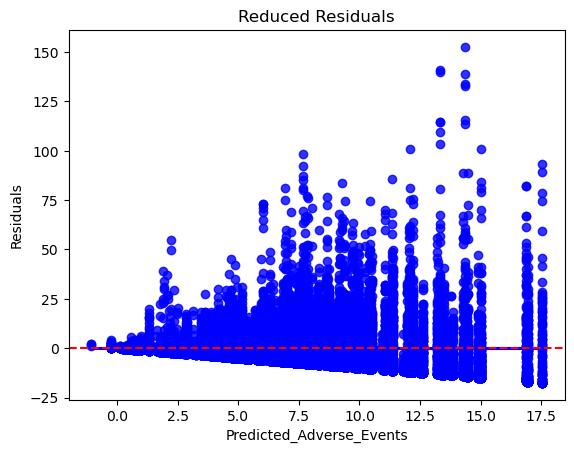

In [13]:
#Create scatterplot of residuals
df['Intercept']=1
sns.regplot(x='Predicted_Adverse_Events', y='Residuals', data=df, color='blue', ci=None)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Reduced Residuals')
plt.show()

In [14]:
#Residual standard of error
model = sm.OLS(y, X).fit()
model.resid.std(ddof=X.shape[1])

11.382601686854406